In [1]:
import pandas as pd
import os, sys
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
from matplotlib import rc
import numpy as np

In [2]:
# Inputfolder & files
inputfolder = f"../Data"

# Nakamura dataset

### Description of arrivals CSV

* Rows are referred to the deep moonquake cluster type, i.e. A1, AX (with 'X' being a number).

* Columns are referred to P or S waves detected from different space stations.

	- Space stations from 12 to 16, with data from the station n. 12 being of the highest quality.

	- Wave types being S or P:

		* P-waves: primary waves that arrive first.
		* S-waves: secondary waves that arrive later.

### Description of locations CSV

* Rows are referred to the deep moonquake cluster type, i.e. A1, AX (with 'X' being a number).

* Column description:

	- 'Side': moon side, either Far (F) or Near (N).
	- Coordinates and associated errors.
	- 'Depth' for the moonquake, from 500 to 1500 km.
	- 'Assumed': the arrival-time data are not suficient to determine the depths, thus assumed.

### Description of levent_weber CSV

* No

* Columns of interest:

	- Y, JD, S, E: time register
	- A1: A1 deep moonquakes
	- T1, N1, T2, N2:
	- Grade:
	- Traces:
	- Station + coordinates: [12-16]

In [3]:
# Deep Moonquakes
dm_files = f"_2005_dm_"
arrivals = pd.read_csv(f"{inputfolder}/nakamura{dm_files}arrivals.csv")
locations = pd.read_csv(f"{inputfolder}/nakamura{dm_files}locations.csv")
locations_arrivals_nakamura_dm = locations.merge(arrivals, on="A", how="outer")
if not os.path.exists(f"{inputfolder}/locations_arrivals_nakamura_dm.csv"): locations_arrivals_nakamura_dm.to_csv(f"{inputfolder}/locations_arrivals_nakamura_dm.csv", index=False)
locations_arrivals_nakamura_dm

,A,Side,Lat,Lat_err,Long,Long_err,Depth,Depth_err,Assumed,12P,14P,15P,16P,12S,14S,15S,16S
0,1,N,-15.7,2.4,-36.6,4.6,867.0,29.0,N,138,140,197,184,230,233,341,323
1,3,N,-2.9,1.7,-50.3,6.3,946.0,22.0,N,,122,,,227,230,311,330
2,5,N,1.1,94.2,-44.7,16.4,933.0,109.0,Y,,141,,,232,242,,351
3,6,N,43.5,2.9,55.5,9.5,844.0,33.0,N,190,188,120,155,373,360,245,307
4,7,N,25.0,1.7,53.2,8.0,893.0,27.0,N,180,171,119,127,351,337,243,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,267,227,
162,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,238
163,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,268,243
164,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,185,,280


In [4]:
# Artificial Impacts
ai_files = f"_1983_ai_"
arrivals = pd.read_csv(f"{inputfolder}/nakamura{ai_files}arrivals.csv")
locations = pd.read_csv(f"{inputfolder}/nakamura{ai_files}locations.csv")
locations_arrivals_nakamura_ai = locations.merge(arrivals, on="AI", how="outer")
if not os.path.exists(f"{inputfolder}/locations_arrivals_nakamura_ai.csv"): locations_arrivals_nakamura_ai.to_csv(f"{inputfolder}/locations_arrivals_nakamura_ai.csv", index=False)
locations_arrivals_nakamura_ai

,AI,Lat,Long,Y,JD,Hour,Min,Sec,12P,14P,...,12D,14D,15D,16D,17D,12T,14T,15T,16T,17T
0,12 LM,-3.94,-21.20,69,324,22,17,17.7,NaN,NaN,...,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13 S-IVB,-2.75,-27.86,70,105,1,9,41.0,10:09.6,NaN,...,135,NaN,NaN,NaN,NaN,28.6,NaN,NaN,NaN,NaN
2,14 S-IVB,-8.09,-26.02,71,35,7,40,55.4,41:31.1,NaN,...,172,NaN,NaN,NaN,NaN,35.7,NaN,NaN,NaN,NaN
3,14 LM,-3.42,-19.67,71,38,0,45,26.7,45:52.0,45:44.5,...,114,67.0,NaN,NaN,NaN,25.0,17.8,NaN,NaN,NaN
4,15 S-IVB,-1.51,-11.81,71,210,20,58,42.9,59:37.9,59:19.5,...,355,184.0,NaN,NaN,NaN,55.0,36.6,NaN,NaN,NaN
5,15 LM,26.36,0.25,71,215,3,3,37.0,NaN,NaN,...,1130,1048.0,93.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN
6,17 S-IVB,-4.21,-12.31,72,345,20,32,42.3,33:38.3,33:14.3,...,338,157.0,1032.0,850.0,NaN,56.0,32.0,151.0,123.1,NaN
7,17 LM,19.99,30.51,72,350,6,50,20.8,NaN,NaN,...,1750,1599.0,770.0,986.0,9.0,NaN,NaN,NaN,NaN,5.8


In [5]:
# Shallow Moonquakes
# Remove columns on hour, minute and seconds because different naming conventions
sm_files = f"_sm_"
arrivals = pd.read_csv(f"{inputfolder}/nakamura_1983{sm_files}arrivals.csv").drop(["Hour"], axis=1)
locations = pd.read_csv(f"{inputfolder}/nakamura_1979{sm_files}locations.csv").drop(["H", "M", "S"], axis=1)
locations_arrivals_nakamura_sm = locations.merge(arrivals, on=["Year", "Day"], how="outer")
if not os.path.exists(f"{inputfolder}/locations_arrivals_nakamura_sm.csv"): locations_arrivals_nakamura_sm.to_csv(f"{inputfolder}/locations_arrivals_nakamura_sm.csv", index=False)
# locations_arrivals_nakamura_sm

# Heatmap based on moonquake depth - Lognonné et al. (2003)

In [19]:
def rgb(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)
    ratio = 2 * (value-minimum) / (maximum - minimum)
    b = int(max(0, 255*(1 - ratio)))
    r = int(max(0, 255*(ratio - 1)))
    g = 255 - b - r
    return r, g, b

In [20]:
rgbvalue = rgb(0, 1200, 10)
rgbvalue

(0, 5, 250)

## Process dataframe

In [11]:
lognonne_df = pd.read_csv(f"{inputfolder}/lognonne_2003_catalog.csv")

# New columns for Date & RGB
lognonne_df["Year"]=0
lognonne_df["Month"]=0
lognonne_df["Day"]=0
lognonne_df["Hour"]=0
lognonne_df["Minute"]=0

lognonne_df["R"]=0
lognonne_df["G"]=0
lognonne_df["B"]=0

# RGB scale based on moonquake depth
min_depth = lognonne_df["Depth"].min()
max_depth = lognonne_df["Depth"].max()


# Process Date column & RGB column
for row in lognonne_df.itertuples():
	index = row[0]
	depth = lognonne_df.loc[index, "Depth"]
 
	# Date column into Year, Month, etc.
	lognonne_df.loc[index, "Year"] = str(19)+str(lognonne_df.loc[index, "Date"])[0:2]
	lognonne_df.loc[index, "Month"] = str(lognonne_df.loc[index, "Date"])[2:4]
	lognonne_df.loc[index, "Day"] = str(lognonne_df.loc[index, "Date"])[4:6]
	lognonne_df.loc[index, "Hour"] = str(lognonne_df.loc[index, "Date"])[6:8]
	lognonne_df.loc[index, "Minute"] = str(lognonne_df.loc[index, "Date"])[8:]

	# RGB colour scale
	lognonne_df.loc[index, "R"], lognonne_df.loc[index, "G"], lognonne_df.loc[index, "B"] = rgb(min_depth, max_depth, depth)

lognonne_df=lognonne_df.drop(["Date"], axis=1)

# transfoorm Lat, Long to radians
lognonne_df["Latrad"] = lognonne_df["Lat"]*(np.pi/180)
lognonne_df["Longrad"] = lognonne_df["Long"]*(np.pi/180)

sphere_radius = 10
lognonne_df["zpos"]= sphere_radius * np.cos(lognonne_df["Latrad"]) * np.cos(lognonne_df["Longrad"])
lognonne_df["ypos"]= sphere_radius * np.sin(lognonne_df["Latrad"])
lognonne_df["xps"]= -sphere_radius * np.cos(lognonne_df["Latrad"]) * np.sin(lognonne_df["Longrad"])

In [ ]:
lognonne_df.describe()

,Lat,Long,Depth,Phi,Delta-a,Delta-b,Depth_err,Seconds,Time_err,12P,...,16P,16P_EC,12S,12S_EC,14S,14S_EC,15S,15S_EC,16S,16S_EC
count,59.000000,59.000000,58.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,42.000000,...,41.000000,48.000000,34.000000,34.000000,33.000000,33.000000,36.000000,36.000000,32.000000,32.000000
mean,7.897288,-1.041017,398.568966,-1.847458,2.045763,12.325424,21.305085,28.487966,1.996610,199.800000,...,230.082927,1.041667,329.633235,1.382353,318.581818,1.151515,313.566667,1.166667,365.418750,1.406250
std,26.596983,47.853196,470.571325,45.189949,1.594097,34.213899,34.532471,16.543394,1.905434,102.643285,...,84.272771,0.797825,129.292568,0.739152,106.409446,0.755034,102.891082,0.774597,97.232987,0.614837
min,-52.400000,-121.300000,0.000000,-85.000000,0.000000,0.000000,0.000000,2.890000,0.000000,31.400000,...,70.500000,0.000000,56.290000,0.000000,97.500000,0.000000,69.000000,0.000000,248.800000,0.000000
25%,-5.755000,-27.980000,0.000000,-30.000000,1.050000,0.600000,0.000000,16.190000,0.600000,125.000000,...,178.000000,0.000000,258.725000,1.000000,270.100000,1.000000,263.650000,1.000000,314.350000,1.000000
50%,7.400000,-10.000000,1.000000,0.000000,1.800000,1.000000,12.000000,27.240000,1.300000,192.900000,...,204.500000,1.000000,312.750000,2.000000,300.600000,1.000000,304.250000,1.000000,342.250000,1.000000
75%,23.450000,28.450000,899.500000,38.000000,2.750000,1.950000,24.500000,40.140000,2.800000,248.725000,...,280.000000,2.000000,387.825000,2.000000,387.700000,2.000000,356.900000,2.000000,382.875000,2.000000
max,74.100000,137.600000,1200.000000,87.000000,7.700000,179.000000,179.000000,58.840000,7.400000,473.700000,...,445.800000,2.000000,655.900000,2.000000,581.000000,2.000000,608.000000,2.000000,730.000000,2.000000


## 2D heatmap

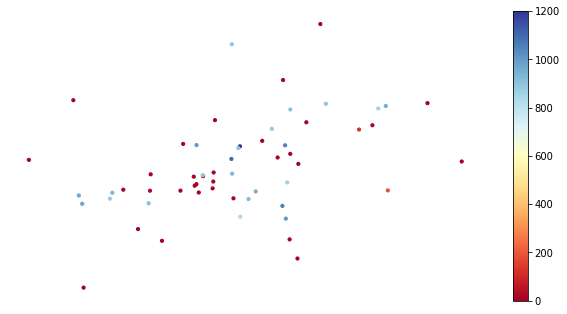

In [ ]:
mydpi=96
transparent=False
cm = plt.cm.get_cmap('RdYlBu')
fit_scatter = plt.figure(num=0, clear=True, figsize=(1024/mydpi, 512/mydpi))
sc = plt.scatter(lognonne_df.Lat, lognonne_df.Long, s=10, c=lognonne_df.Depth, cmap=cm)
plt.xticks(ticks=[], labels=[])
plt.yticks(ticks=[], labels=[])
plt.axis('off')  # command for hiding the axis.
fit_scatter.savefig("../images/moon_heatmap.png", transparent=transparent, dpi=mydpi)
plt.colorbar(sc)
# plt.close(fit_scatter)

## Save dataframe

In [ ]:
recompute = True
if not os.path.exists(f"{inputfolder}/lognonne_2003_catalog_adapted.csv") or recompute:
    lognonne_df.to_csv(f"{inputfolder}/lognonne_2003_catalog_adapted.csv", index=False)